<a href="https://colab.research.google.com/github/Devmurthy/devmurthy/blob/main/Waste_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"murthy2005","key":"dcdcc1566c1dc7571272996fdc352617"}'}

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [4]:
!kaggle datasets download -d techsash/waste-classification-data
!unzip waste-classification-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define paths
train_dir = '/content/dataset/DATASET/TRAIN'
test_dir = '/content/dataset/DATASET/TEST'

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


705/705 ━━━━━━━━━━━━━━━━━━━━ 1449s 2s/step - accuracy: 0.7754 - loss: 0.4831 - val_accuracy: 0.8474 - val_loss: 0.3667
Epoch 2/30
  1/705 ━━━━━━━━━━━━━━━━━━━━ 17:30 1s/step - accuracy: 0.8750 - loss: 0.3356

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 375us/step - accuracy: 0.8750 - loss: 0.3356 - val_accuracy: 0.8824 - val_loss: 0.2166
Epoch 3/30
705/705 ━━━━━━━━━━━━━━━━━━━━ 1459s 2s/step - accuracy: 0.8261 - loss: 0.4063 - val_accuracy: 0.8646 - val_loss: 0.3454
Epoch 4/30
705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 311us/step - accuracy: 0.7500 - loss: 0.6763 - val_accuracy: 1.0000 - val_loss: 0.1340
Epoch 5/30
705/705 ━━━━━━━━━━━━━━━━━━━━ 1441s 2s/step - accuracy: 0.8420 - loss: 0.3756 - val_accuracy: 0.8650 - val_loss: 0.3552
Epoch 6/30
705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 610us/step - accuracy: 0.8438 - loss: 0.3650 - val_accuracy: 0.8824 - val_loss: 0.3344
Epoch 7/30
705/705 ━━━━━━━━━━━━━━━━━━━━ 1441s 2s/step - accuracy: 0.8494 - loss: 0.3552 - val_accuracy: 0.8778 - val_loss: 0.3141
Epoch 8/30
705/705 ━━━━━━━━━━━━━━━━━━━━ 3s 364us/step - accuracy: 0.8750 - loss: 0.2957 - val_accuracy: 0.8824 - val_loss: 0.7581
Epoch 9/30
705/705 ━━━━━━━━━━━━━━━━━━━━ 1416s 2s/step - accuracy: 0.8529 - loss: 0.3539 - val_accurac

In [8]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

79/79 ━━━━━━━━━━━━━━━━━━━━ 44s 554ms/step - accuracy: 0.9112 - loss: 0.2554
Test Accuracy: 90.57%


In [9]:
import keras.saving
keras.saving.save_model(model, 'waste_classification_model.keras')


In [12]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('waste_classification_model.keras')

# Function to classify waste
def classify_waste(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    if predictions[0] > 0.5:
        return "Non-Biodegradable"
    else:
        return "Biodegradable"

# Example usage
print(classify_waste('/content/WhatsApp Image 2025-02-01 at 21.19.51.jpeg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Biodegradable


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predicted labels
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).flatten()  # Convert probabilities to binary predictions (0 or 1)

79/79 ━━━━━━━━━━━━━━━━━━━━ 44s 552ms/step


In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 50.46%


In [15]:
print(classification_report(y_true, y_pred, target_names=['Biodegradable', 'Non-Biodegradable']))

                   precision    recall  f1-score   support

    Biodegradable       0.56      0.56      0.56      1401
Non-Biodegradable       0.44      0.44      0.44      1112

         accuracy                           0.50      2513
        macro avg       0.50      0.50      0.50      2513
     weighted avg       0.50      0.50      0.50      2513



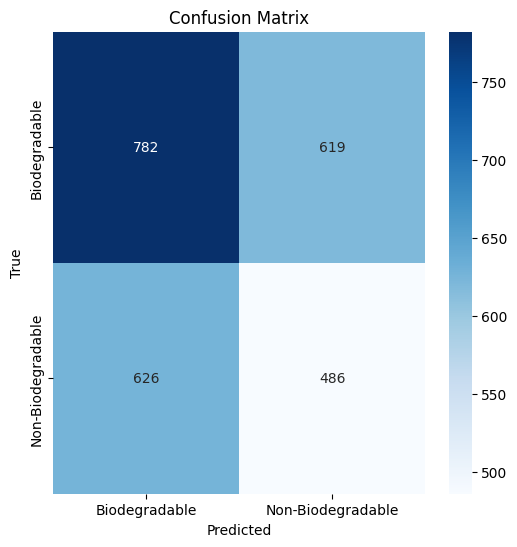

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Biodegradable', 'Non-Biodegradable'],
            yticklabels=['Biodegradable', 'Non-Biodegradable'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.44
Recall: 0.44
F1-Score: 0.44
